In [1]:
import pandas as pd 
import numpy as np 
np.random.seed(123) 
variables = ['X', 'Y', 'Z'] 
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4'] 
X = np.random.random((5, 3))*10 
df = pd.DataFrame(X, columns=variables, index=labels)

In [2]:
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Perform hierarchical clustering on a distance matrix

In [3]:
from scipy.spatial.distance import pdist, squareform 

row_dist = pd.DataFrame(squareform(
                        pdist(X, metric='euclidean')), 
                       columns=labels, index=labels) 

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [4]:
from scipy.cluster.hierarchy import linkage 

row_clusters = linkage(
                        pdist(X, metric='euclidean'), method='complete'
)

In [5]:
pd.DataFrame(
            row_clusters, 
            columns=['row lable 1', 'row label 2', 
                    'distance', 'np.of items in clust'], 
            index=[f'cluster {(i+1)}' for i in range(row_clusters.shape[0])]
)  

,row lable 1,row label 2,distance,np.of items in clust
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


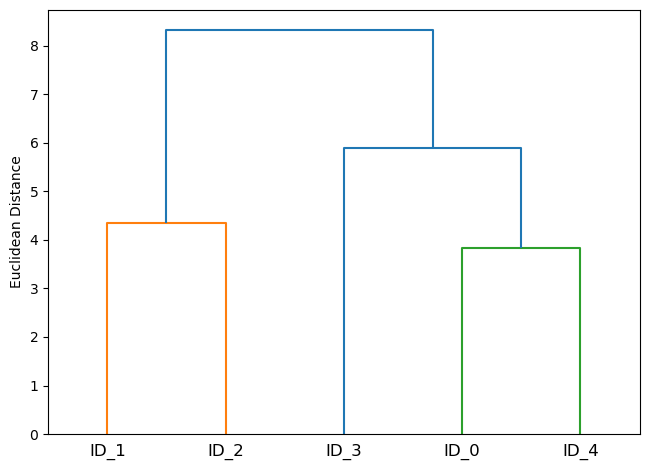

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram 

row_dendr = dendrogram(
    row_clusters, labels=labels
)

plt.tight_layout() 
plt.ylabel('Euclidean Distance') 
plt.show()

C:\Users\28718\AppData\Local\Temp\ipykernel_43968\3355631898.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\28718\AppData\Local\Temp\ipykernel_43968\3355631898.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


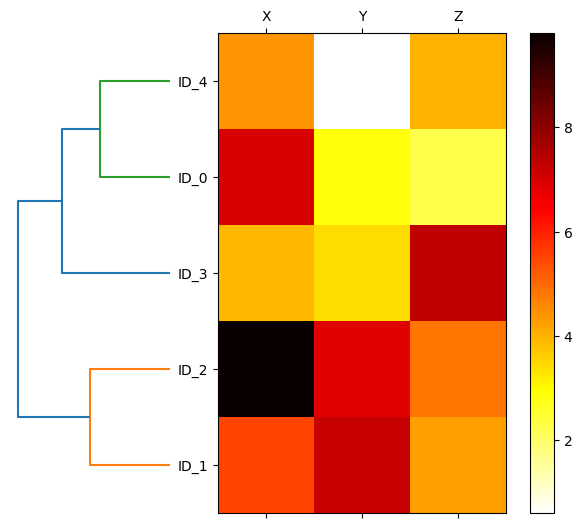

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# 创建画布
fig = plt.figure(figsize=(8, 8), facecolor='white')

# 绘制左侧树状图
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
axd.set_xticks([])
axd.set_yticks([])
for spine in axd.spines.values():
    spine.set_visible(False)

# 按树状图排序数据（并反转行顺序）
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 绘制右侧热图
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

# 设置轴标签
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()


# Using Scikit-learn

In [8]:
from sklearn.cluster import AgglomerativeClustering 

ac=AgglomerativeClustering(n_clusters=2, 
                          metric='euclidean', 
                          linkage='complete') 

labels=ac.fit_predict(X) 
print(f'Cluster Labels:{labels}')

Cluster Labels:[0 1 1 0 0]
